# About this notebook
Here I tried to use solely matplotlib and numpy to build the linear regression from scratch. This also has the functionality of plotting the graphs of the cost function J(theta) and the current fitted line in real-time. Pandas, scikit-learn or any other libraries are not used **on purpose**. Yes, Yes, I am aware of them :)

© created by Artem Tkachuk on 11/03/2019 (03.11.2019)

# Imports

In [20]:
import io
import numpy as np
import matplotlib
import matplotlib.pyplot as plt; plt.ion()
#ion() - interactive mode - is required for the "LIVE" effect

# Read data

In [21]:
def readFile(fn):
    f = open(fn, 'r')
    #+ 1 because below we add a column of x0, where each entry is 1
    m = int(f.readline()) + 1 
    n = int(f.readline())

    #delete all commas
    lines = f.read().replace(",", " ")
    #spent a lot of time on StackOverflow with this line
    data = np.genfromtxt(io.StringIO(lines))
    #add x0
    data = np.insert(data, 0, 1, axis=1)

    return (data, n, m)

Basically, the constant that defines how often the graphs will be replotted

In [22]:
frequency = 100000

# Graphing

### Plotting the cost function LIVE

Initialize all objects, set limits, names, etc, and return them to train() function

In [23]:
def init_cost(fn):
    fig = plt.figure(0, figsize=(10, 8))

    ax = fig.add_subplot(1, 1, 1)
    ax.grid()
    ax.set_ylim(-1.0, 1.0)

    #set labels
    plt.xlabel('n Times')
    plt.ylabel('J(Θ)')
    plt.title(f'"{fn}" dataset\'s cost function')

    xdata, ydata = [], []
    # ',' because we do not need the second object 
    line, = ax.plot(xdata, ydata, 'r-')
    
    #return all the objects to train() for replotting later
    return (fig, ax, xdata, ydata, line)

**replot_cost()** is called each time the thetas (aka parameters) are recalculated => the new value for J is obtained (on every iteration of the training loop). It replots the graph of a cost functiuon with a certain frequency (frequency is defined above)

In [24]:
def replot_cost(fig, ax, line, nTimes, xdata, ydata, k, LL):
    #get current limits
    _, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    
    #properly choose how to adjust the limits on both axes
    if k > xmax:
        xmax = nTimes if 2 * k > nTimes else 2 * k
    if LL > ymax:
        ymax = 1.2 * LL
    if LL < ymin:
        ymin = 1.2 * LL
    
     #properly adjust the limits
    ax.set_xlim(0, xmax)
    ax.set_ylim(ymin, ymax)
    
    #update the line datapoints
    xdata.append(k + 1)
    ydata.append(LL)
    line.set_data(xdata, ydata)
    
    #only replot with certain frequency (defined above)
    if k % (nTimes / frequency) == 0:
        fig.canvas.draw()
        fig.canvas.flush_events()

### Fitting the line with current parameters LIVE

Initialize all objects, set limits, names, etc, and return them to train() function

In [25]:
def init_line(X, y, thetas):
    fig = plt.figure(1, figsize=(10,8))

    ax = fig.add_subplot(1, 1, 1)
    ax.grid()

    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Data scatterplot and a fitted line')
    
    xdata = X[:, 1]
    #calculate the fitted values with current parameter values
    ydata = np.matmul(X, thetas)

    #plot initial line
    line, = ax.plot(xdata, ydata, 'r-')
    #scatterplot of the data we have
    data_plot = ax.scatter(xdata, y)

    return (fig, ax, xdata, line)

**replot_line()** is called each time the thetas (aka parameters) are recalculated, and it replots the graph of the fitted line and scattered data with a certain frequency (frequency is defined above)

In [26]:
def replot_line(fig, ax, xdata, line, X, thetas, k, nTimes):
    #recalculate the fitted values
    ydata = np.matmul(X, thetas)
    #update the line
    line.set_data(xdata, ydata)

    #only replot with certain frequency (defined above)
    if k % (nTimes / frequency) == 0:
        fig.canvas.draw()
        fig.canvas.flush_events()

# Training

The training process. Tries to find the best values for thetas (parameters) such that the line fits the data in the best possible way. Also calculates the cost function and replots the line and the graph of the cost function on each training iteration with the "LIVE" effect!!!! _(WOOOOOWWWOWOOOWOWOOWOW)_

## Explanation

Let's talk about the training process. I am not going to go into details about these two lines of code. In short, they provide the functionality of replotting the graphs of the cost function $J(\theta)$ and the line we are trying to fit on each iteration of the training loop.

The full code of the train() function

In [27]:
def train(fn):
    #number of training iterations
    nTimes = 20
    #step size (learning rate)
    rate = 0.001
    #data, # of training examples, # of input features + 1
    data, n, m = readFile(fn)

    #slice input features only
    X = data[:, :-1]
    #slice targets only
    y = data[:, -1]
    #initial values for parameters
    thetas = np.random.rand(m)
    #initialize gradients
    gradient = np.zeros(m)

    #initialize the objects for cost function continuous replotting
    fig_cost, ax_cost, xdata_cost, ydata_cost, curve = init_cost('Movie Revenue')
    #initialize the objects for the continuous replotting of the fitted line
    fig_line, ax_line, xdata_line, line, = init_line(X, y,thetas)

    #the actual training process
    for k in range(nTimes):
        h = np.matmul(X, thetas)
        delta = y - h
        #get the partial derivatives
        gradient = -2 * np.sum(X * delta[:, np.newaxis], axis=0)
        #update the parameters
        thetas -= rate * gradient

        #cost function's current value
        J = np.sum(delta * delta)
        
        #replot the cost function and the fitted line
        replot_cost(fig_cost, ax_cost, curve, nTimes, xdata_cost, ydata_cost, k, J)
        replot_line(fig_line, ax_line, xdata_line, line, X, thetas, k, nTimes)
    
    #this line is needed for graphs to stay afterwards
    plt.ioff()
    #save the .png of the graphs for later reference
    plt.savefig('src/graph/line_graph.png')
    plt.savefig('src/graph/final_line.png')

    return thetas

# Main

Launches the training process, outputs the obtained values for parameters, and lets the graphs of the cost function and the scatterplot of data with the fitted line stay

In [28]:
def main():
    fileName = 'src/data/simple.txt'
#     'cost_revenue_clean_custom.txt'

    thetas = train(fileName)
    print('Thetas:', thetas)
    # let the graphs stay when done
    plt.show()

Calls main and, therefore, launches everything

Thetas: [1.3088955  2.43026216]


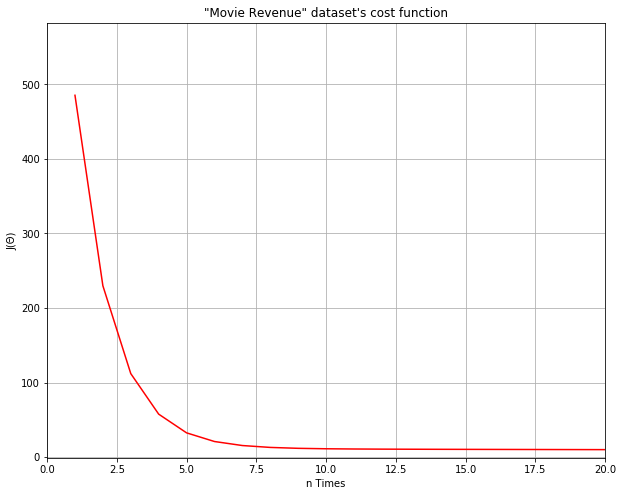

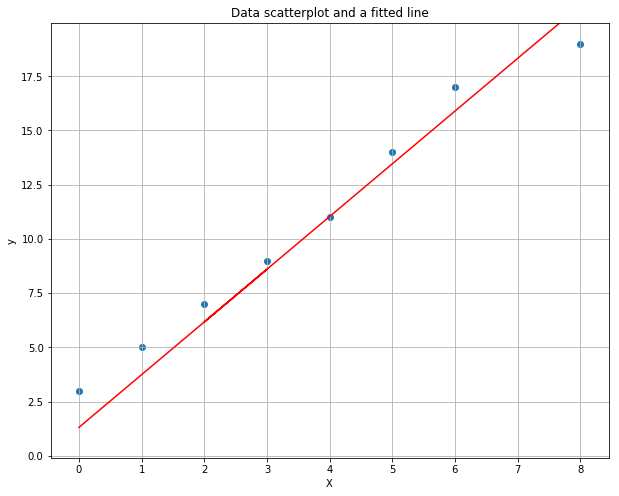

In [29]:
main()